# Diabetic Retinopathy Detection

In [3]:
#Python 3import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import tensorflow as tf
print('TF: {}'.format(tf.__version__))

from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

TF: 2.10.0


In [5]:
LabelsCsv = pd.read_csv('/Volumes/Extreme SSD/DR/trainLabels.csv')

In [6]:
LabelsCsv.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

In [7]:
print(len(LabelsCsv))

35126


In [8]:
LabelsCsv.head(5)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


0 — Normal

1 — Mild NPDR

2 — Moderate NPDR

3 — Severe NPDR

4 — PDR

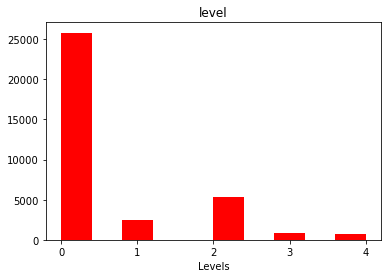

In [6]:
LabelsCsv.hist(color = "red")
plt.grid(False)
plt.xticks([0,1,2,3,4])
plt.xlabel('Levels')
plt.show() 

### Sample Images

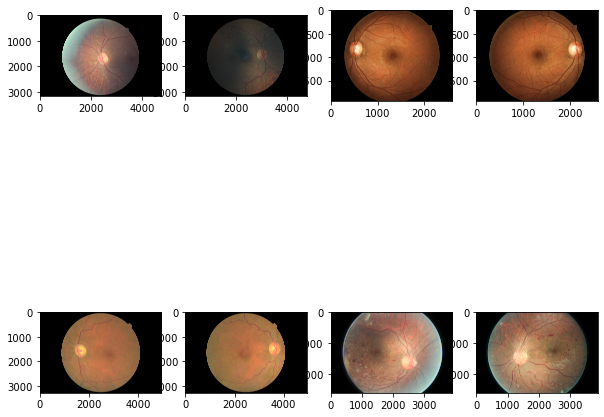

In [7]:
fig, ax = plt.subplots(2,4, figsize=(10, 10))
ax[0,0].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/10_left.jpeg"))
ax[0,1].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/10_right.jpeg"))
ax[0,2].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/13_left.jpeg"))
ax[0,3].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/13_right.jpeg"))

ax[1,0].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/15_left.jpeg"))
ax[1,1].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/15_right.jpeg"))
ax[1,2].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/16_left.jpeg"))
ax[1,3].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/16_right.jpeg"))


In [9]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score

In [10]:
import random
import tensorflow as tf
seed = 42
rng = np.random.RandomState(seed)
import cv2
import os
import glob

In [11]:
print(tf.test.gpu_device_name())
from tensorflow.keras import layers, models

2022-11-08 10:08:14.960551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#class distribution in the dataset
LabelsCsv['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [13]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

hello = tf.constant('Hello, TensorFlow!')

sess = tf.compat.v1.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


2022-11-08 10:08:23.700425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [16]:
data['image'] = data['image'] + '.jpeg'
print(data['image'])

NameError: name 'data' is not defined

## Image resizing

In [14]:
img_size = cv2.imread('/Volumes/Extreme SSD/DR/sample/13_left.jpeg', cv2.IMREAD_UNCHANGED)

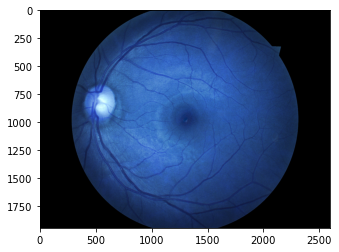

In [15]:
#Show the image with matplotlib
%matplotlib inline
plt.imshow(img_size)
plt.show()

In [16]:
print('Original Dimensions : ',img_size.shape)

Original Dimensions :  (1944, 2592, 3)


In [14]:
#scale_percent = 50 # percent of original size
#width = int(img_size.shape[1] * scale_percent / 100)
#height = int(img_size.shape[0] * scale_percent / 100)
#dim = (width, height)

In [17]:
# resize image
resized = cv2.resize(img_size, (256,256), interpolation = cv2.INTER_AREA)

In [18]:
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (256, 256, 3)


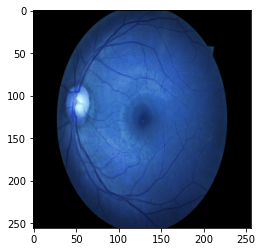

In [19]:
#Show the image with matplotlib
%matplotlib inline
plt.imshow(resized)
plt.show()

In [25]:
inputFolder = "/Volumes/Extreme SSD/DR/DR Images/train 2"
outputFolder = '/Volumes/Extreme SSD/DR/DR Images/Resized_Train_Images'
try:
    os.mkdir(outputFolder)
except:
    pass
skippedImgCount = 0
for img in glob.glob(inputFolder + "/*.jpeg"):
    #print(img)
    filename = img.rsplit('/', 1)[-1]
    #print(filename)
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (256,256)) #256*256*3 pixels
    
    BLACK = np.array([0,0,0],np.uint8)
    BLACK1 = np.array([30,30,30],np.uint8)
    blackRange = cv2.inRange(imgResized,BLACK,BLACK1)
    Black_count = cv2.countNonZero(blackRange)
    #print(count)
    
    WHITE = np.array([240,240,240],np.uint8)
    WHITE1 = np.array([256,256,256],np.uint8)
    whiteRange = cv2.inRange(imgResized,WHITE,WHITE1)
    white_count = cv2.countNonZero(whiteRange)
    
    threshold = ((256 * 256) / 100 )* 40 #For gettting images with atleast 40% of black pixel
    
    if Black_count < threshold and white_count < threshold:
        #print(count)
        cv2.imwrite(os.path.join(outputFolder , filename),imgResized) 
    else:
        skippedImgCount += 1
    #break
print(skippedImgCount)

3605


Premature end of JPEG file
